## Step 1: Load Articles into a DataFrame

In this step, we will load all published articles associated with our Dev.to account into a Pandas DataFrame. This data will allow us to examine the article titles and publication dates.

The `load_articles_to_dataframe` function fetches articles from the Dev.to API, handles pagination, and organizes the results in a DataFrame for easy analysis.


In [1]:
import os
import src.api_client as api_client
import pandas as pd

# Check if the articles file exists
if os.path.exists("articles.parquet"):
    # Load articles from the existing Parquet file
    articles_df = pd.read_parquet("articles.parquet")
    print("Loaded articles from articles.parquet")
else:
    # Fetch articles and save to Parquet file
    articles_df = api_client.load_articles_to_dataframe()
    articles_df.to_parquet("articles.parquet", compression='gzip')
    print("Fetched articles from API and saved to articles.parquet")

articles_df.head(10)

Loaded articles from articles.parquet


,title,created_at,public_reactions_count
0,12 Steps to Organize and Maintain Your Python ...,2024-10-30T16:16:25.202Z,6
1,Data Analytics Dashboard Starter Kit with Neon...,2024-08-31T11:22:21.164Z,23
2,Binary Tree,2024-06-16T10:24:55.823Z,9
3,My Journey Learning AI for Songwriting: LSTMs ...,2024-02-19T13:47:52.939Z,17
4,The Data Engineering Docker-Compose Starter Kit,2023-09-22T09:38:28.956Z,13
5,The Golang Saga: A Coder’s Journey There and B...,2023-08-16T17:06:20.082Z,7
6,The Golang Saga: A Coder’s Journey There and B...,2023-07-27T16:19:13.884Z,7
7,The Golang Saga: A Coder’s Journey There and B...,2023-07-04T19:27:11.200Z,22
8,Unleash Your Pipeline Creativity: Local Develo...,2023-05-03T07:52:12.468Z,5
9,From Kafka to Amazon S3: Partitioning Outputs,2023-04-09T16:03:41.325Z,7


## Step 2: Load Followers into a DataFrame

Next, we’ll load the details of all followers into a Pandas DataFrame. This data provides insights into each follower’s profile, which we can later analyze to assess follower engagement and activity levels.

The `load_followers_to_dataframe` function collects data on each follower, including profile information.


In [2]:
# Check if the followers file exists
if os.path.exists("followers.parquet"):
    # Load followers from the existing Parquet file
    followers_df = pd.read_parquet("followers.parquet")
    print("Loaded followers from followers.parquet")
else:
    # Fetch followers and save to Parquet file
    followers_df = api_client.load_extended_followers_to_dataframe()
    followers_df.to_parquet("followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to followers.parquet")

followers_df.head(10)

Loaded followers from followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024"
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024"
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024"


In [3]:
print(f"You have {len(articles_df)} articles and {len(followers_df)} followers.")

You have 11 articles and 2485 followers.


## Step 3: Enrich Followers Data with Article Information

In this step, we expand our analysis by adding article information for each follower. Using the `update_followers_with_articles` function, we retrieve:

- The total number of articles each follower has published (`article_count`).
- A list of article titles for each follower (`article_titles`).
- A unique list of tags across all articles by each follower (`unique_tags`).

This enriched data will allow us to better understand follower engagement and interests based on their content.

In [4]:
if os.path.exists("extended_followers.parquet"):
    # Load followers from the existing Parquet file
    extended_followers_df = pd.read_parquet("extended_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    # Enrich followers with article information
    extended_followers_df = api_client.update_followers_with_articles(followers_df)
    extended_followers_df.to_parquet("extended_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,Development,None,None,"Oct 31, 2024",0,[],[],[],[],[]
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",0,[],[],[],[],[]
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Aug 31, 2024",0,[],[],[],[],[]


In [5]:
extended_followers_df[extended_followers_df['article_count']>0]

,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,summary,location,website_url,joined_at,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts
46,user_follower,58202818,2024-10-31T07:44:06Z,2313000,Mareyia,/mareyiaz,mareyiaz,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 31, 2024",1,[Card Fight: A Python Terminal Game],"[gamedev, python, webdev]",[1],[0],[0]
201,user_follower,58161903,2024-10-30T19:18:12Z,2309694,Jørn Andre,/john828,john828,"https://media2.dev.to/dynamic/image/width=320,...",None,None,"Founder of https://tbtm.sale, creating innovat...","Bergen, Norway",https://tbtm.sale,"Oct 30, 2024",1,[Building a Bible Publication Engine],"[linux, python, mysql]",[2],[0],[1]
204,user_follower,58161484,2024-10-30T19:11:26Z,2309628,Sargon The Akkadian,/sargonthegreat,sargonthegreat,"https://media2.dev.to/dynamic/image/width=320,...",None,None,I am an artist and erstwhile programmer starti...,"Chicago, IL",,"Oct 30, 2024",1,[First Post HackingWithSwift],[swift],[1],[0],[0]
228,user_follower,58152586,2024-10-30T17:32:42Z,2309151,Jessica Robin,/jessica_robin_6897a111009,jessica_robin_6897a111009,"https://media2.dev.to/dynamic/image/width=320,...",None,None,None,None,None,"Oct 30, 2024",1,[Bubble Tea Cafe in Seattle: Flavorful Teas & ...,"[news, data]",[4],[0],[0]
317,user_follower,50773250,2024-08-31T18:17:05Z,2008588,Kodade Ilhame,/k_ilhame,k_ilhame,"https://media2.dev.to/dynamic/image/width=320,...",None,None,Software Engineer | Full-Stack Developer | AI ...,"Casablanca, Morocco",https://buymeacoffee.com/ilhamekodade,"Aug 31, 2024",1,[Your 2024 Roadmap to Becoming a Machine Learn...,"[programming, ai, machinelearning]",[3],[12],[6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,user_follower,23382330,2023-07-08T07:03:12Z,1115649,vaibhav maurya,/vai18072002,vai18072002,"https://media2.dev.to/dynamic/image/width=320,...",None,Vai18072002,Study,None,None,"Jul 8, 2023",1,[Hi],[],[0],[0],[1]
2451,user_follower,23379460,2023-07-08T03:54:34Z,1115590,phuocglh,/phuocglh,phuocglh,"https://media2.dev.to/dynamic/image/width=320,...",None,phuocglh,None,None,None,"Jul 8, 2023",1,[PHP test],[],[1],[0],[0]
2457,user_follower,23353185,2023-07-07T06:17:10Z,143954,Aditya,/full_stack_adi,full_stack_adi,"https://media2.dev.to/dynamic/image/width=320,...",full_stack_adi,kianaditya,Full Stack Developer #React #Typescript #Go,Stockholm,https://www.adityanaik.dev,"Mar 10, 2019",6,"[PGBadger | Postgresql log analysis made easy,...","[postgres, websocket, darkmode, authentication...","[3, 3, 4, 2, 3, 1]","[0, 0, 0, 0, 0, 1]","[10, 0, 6, 4, 7, 18]"
2472,user_follower,23293632,2023-07-05T07:34:54Z,442410,Tizianogh,/tizianogh,tizianogh,"https://media2.dev.to/dynamic/image/width=320,...",None,Tizianogh,None,None,None,"Jul 28, 2020",1,"[CORS Issue with Nginx, Angular, and Flask in ...",[],[1],[0],[0]


## Step 4: Enrich Followers Data with Profile Data from Dev.to

In this step, we enhance our follower dataset by including additional profile data scraped from Dev.to:

- **Badges**: List of badges each follower has earned.
- **Comments Count**: Total number of comments written by each follower.
- **Tags Followed**: Number of tags each follower is following.

In [6]:
if os.path.exists("extended_scrapped_followers.parquet"):
    extended_scrapped_followers_df = pd.read_parquet("extended_scrapped_followers.parquet")
    print("Loaded followers from extended_followers.parquet")
else:
    extended_scrapped_followers_df = api_client.update_followers_with_stats(extended_followers_df)
    extended_scrapped_followers_df.to_parquet("extended_scrapped_followers.parquet", compression='gzip')
    print("Fetched followers from API and saved to extended_followers.parquet")

extended_scrapped_followers_df.head(10)

Loaded followers from extended_followers.parquet


,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_count,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count
0,user_follower,58265923,2024-10-31T20:31:45Z,2317444,Mikhail Proshkin,/chernyimisha,chernyimisha,"https://media2.dev.to/dynamic/image/width=320,...",None,Chernyimisha,...,0,[],[],[],[],[],[],[],0,0
1,user_follower,58265700,2024-10-31T20:29:29Z,2317434,Makinde Ogundare,/makinde_ogundare_98f54930,makinde_ogundare_98f54930,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
2,user_follower,58265603,2024-10-31T20:27:45Z,2317422,Martin Mrázek,/martin_mrzek_df31ad2e011,martin_mrzek_df31ad2e011,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
3,user_follower,58256814,2024-10-31T18:27:15Z,2316794,Djonatan Ferreira,/djonatan_schvambach,djonatan_schvambach,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
4,user_follower,58255857,2024-10-31T18:16:47Z,2316737,POL HOME,/pol_home_aa64187dd16c2f2d,pol_home_aa64187dd16c2f2d,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
5,user_follower,58242300,2024-10-31T15:50:38Z,2315816,SNB,/snb_e9f700348abe8099bd968,snb_e9f700348abe8099bd968,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,3
6,user_follower,58240557,2024-10-31T15:30:10Z,2315709,Bradley Romney,/bradley_5d5d92ad28,bradley_5d5d92ad28,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2
7,user_follower,58238596,2024-10-31T14:17:20Z,2315436,herojedrus,/herojedrus_4e80e8e6a297e2,herojedrus_4e80e8e6a297e2,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
8,user_follower,58231742,2024-10-31T12:58:07Z,2314940,Olly,/olly_50b0537711fd798cef32,olly_50b0537711fd798cef32,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,0
9,user_follower,58219213,2024-10-31T10:39:06Z,2007322,Alex Iscanderov,/alex_iscanderov_60b4ea965,alex_iscanderov_60b4ea965,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,0,[],[],[],[],[],[],[],0,2


In [7]:
extended_scrapped_followers_df.columns

Index(['type_of', 'id', 'created_at', 'user_id', 'name', 'path', 'username',
       'profile_image', 'twitter_username', 'github_username', 'summary',
       'location', 'website_url', 'joined_at', 'article_count',
       'article_titles', 'unique_tags', 'article_reading_time_minutes',
       'article_comments_counts', 'article_positive_reactions_counts',
       'badges', 'badge_descriptions', 'comments_count', 'tags_count'],
      dtype='object')

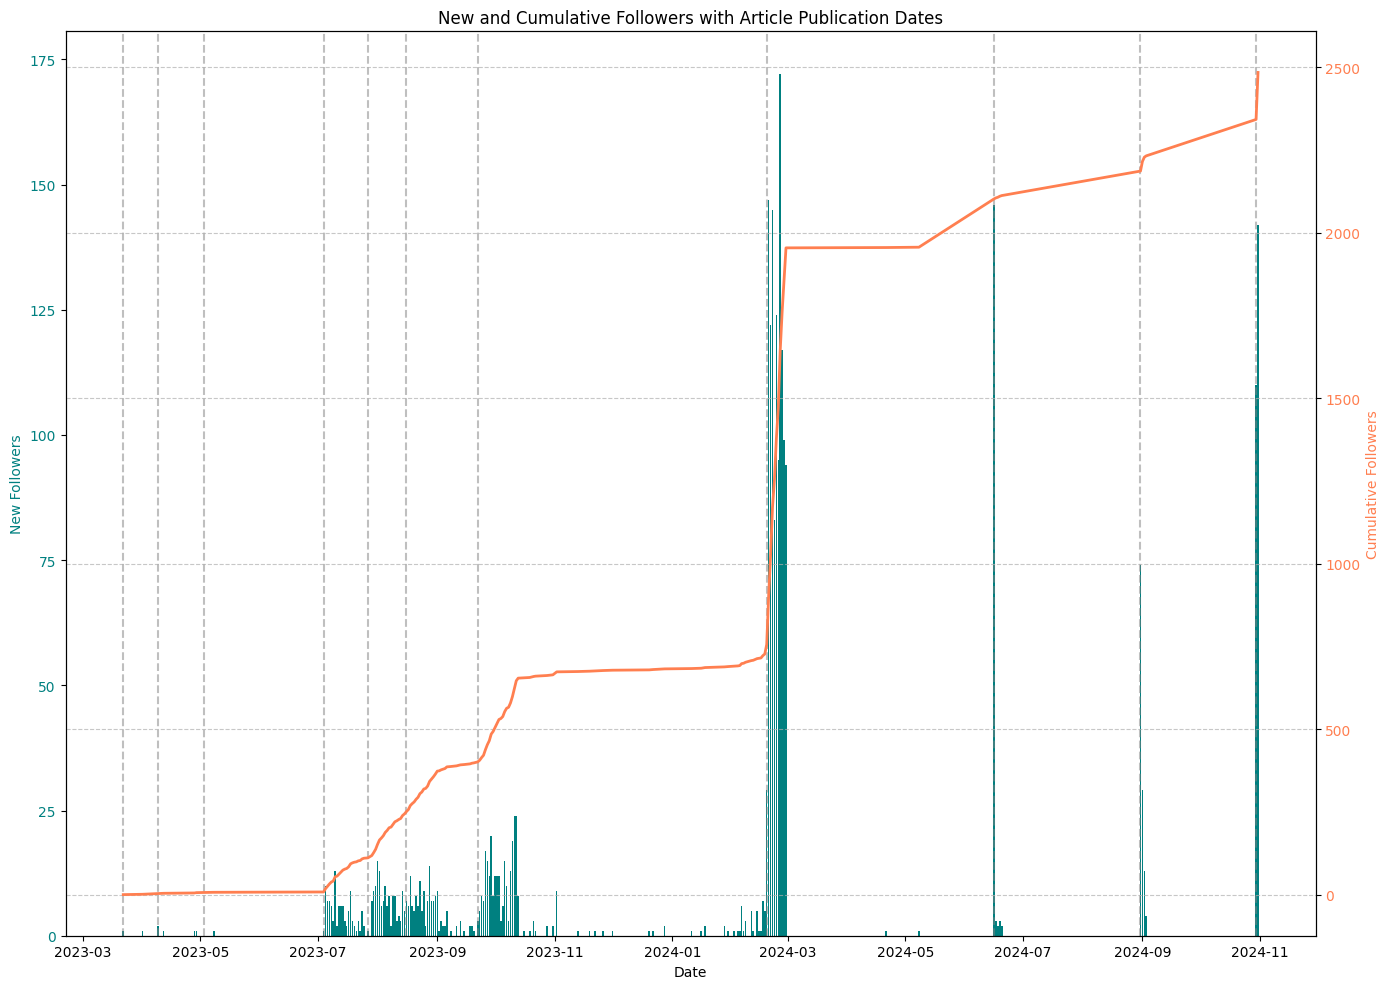

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

# Ensure 'created_at' is in datetime format in the copies
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date

# Calculate the daily follower count and cumulative sum for total followers over time
daily_follower_count = followers_df_copy['created_at'].value_counts().sort_index()
cumulative_followers = daily_follower_count.cumsum()

# Prepare the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plot daily new follower count as bars on the left y-axis
ax1.bar(daily_follower_count.index, daily_follower_count.values, color='teal', label='New Followers')
ax1.set_xlabel("Date")
ax1.set_ylabel("New Followers", color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Set up the right y-axis for cumulative followers
ax2 = ax1.twinx()
ax2.plot(cumulative_followers.index, cumulative_followers.values, color='#FF7F50', linewidth=2, label='Cumulative Followers')
ax2.set_ylabel("Cumulative Followers", color='#FF7F50')
ax2.tick_params(axis='y', labelcolor='#FF7F50')

# Add vertical lines for article publication dates
for article_date in articles_df_copy['created_at']:
    ax1.axvline(x=article_date, color='gray', linestyle='--', alpha=0.5)

# Title and grid
plt.title("New and Cumulative Followers with Article Publication Dates")
fig.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [19]:
import pandas as pd
import plotly.graph_objects as go

# Make copies with new variable names to avoid modifying the original DataFrames
articles_df_copy = articles_df.copy()
followers_df_copy = extended_scrapped_followers_df.copy()

# Ensure 'created_at' is in datetime format in the copies
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date

# Calculate the daily follower count and cumulative sum for total followers over time
daily_follower_count = followers_df_copy['created_at'].value_counts().sort_index()
cumulative_followers = daily_follower_count.cumsum()

# Create the plot
fig = go.Figure()

# Add bars for new followers with the left y-axis
fig.add_trace(go.Bar(
    x=daily_follower_count.index,
    y=daily_follower_count.values,
    name='New Followers',
    marker_color='teal',
    marker_line_color='teal',  # Same color for bar borders
    marker_line_width=1,     # Increased border width for bars
    hovertemplate='Date: %{x}<br>New Followers: %{y}<extra></extra>'
))

# Add a line for cumulative followers with the right y-axis
fig.add_trace(go.Scatter(
    x=cumulative_followers.index,
    y=cumulative_followers.values,
    mode='lines',
    name='Cumulative Followers',
    line=dict(color='#FF7F50', width=3),  # Coral color for cumulative line
    yaxis="y2",
    hovertemplate='Date: %{x}<br>Cumulative Followers: %{y}<extra></extra>'
))

# Add vertical lines for each article date with hover text for article titles
for _, row in articles_df_copy.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['created_at'], row['created_at']],
        y=[0, cumulative_followers.max()],
        mode='lines',
        line=dict(color='gray', dash='dash'),
        hoverinfo='text',
        text=f"Article Date: {row['created_at']}<br>Title: {row['title']}",
        showlegend=False
    ))

# Update layout with customized dimensions, y-axis ranges, and white background
fig.update_layout(
    title="New and Cumulative Followers with Article Publication Dates",
    xaxis_title="Date",
    yaxis=dict(title="New Followers", side='left', range=[0, daily_follower_count.max() * 1.2]),
    yaxis2=dict(title="Cumulative Followers", overlaying='y', side='right', range=[0, cumulative_followers.max() * 1.1]),
    width=1000,   # Increased width for better viewing
    height=800,   # Reduced height
    legend=dict(x=0.01, y=0.99),
    hovermode="x unified",
    bargap=0.2,  # Reduce gap between bars for better density
    plot_bgcolor='white'  # Set background to white
)

# Update grid line colors for better contrast on white background
fig.update_xaxes(showgrid=True, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridcolor='lightgray')

# Show the plot
fig.show()


In [52]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'created_at' and 'joined_at' are in datetime format
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at']).dt.date

# Calculate counts for each category
total_followers = followers_df_copy.shape[0]
same_day_joiners = followers_df_copy[followers_df_copy['created_at'] == followers_df_copy['joined_at']].shape[0]
other_day_joiners = total_followers - same_day_joiners

# Define data for the pie chart
labels = ["Same-Day Followers", "Other-Day Followers"]
values = [same_day_joiners, other_day_joiners]
colors = ["lightgreen", "violet"]

# Create the pie chart
fig = go.Figure(go.Pie(
    labels=labels,
    values=values,
    marker=dict(colors=colors),
    hole=0.3,  # Create a donut-style chart for better readability
    textinfo='label+percent',
    hovertemplate='%{label}: %{value} followers (%{percent})<extra></extra>'
))

# Update layout for better visibility
fig.update_layout(
    title="Distribution of Followers by Join Date",
    height=500,
    width=500
)

# Show the plot
fig.show()


In [51]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'created_at' and 'joined_at' are in datetime format
articles_df_copy['created_at'] = pd.to_datetime(articles_df_copy['created_at']).dt.date
followers_df_copy['created_at'] = pd.to_datetime(followers_df_copy['created_at']).dt.date
followers_df_copy['joined_at'] = pd.to_datetime(followers_df_copy['joined_at']).dt.date

# Prepare data for the bar chart
article_dates = articles_df_copy['created_at'].unique()
total_followers_per_article = []
same_day_joiners_per_article = []
article_labels = [f"Article - {date}" for date in article_dates]  # Label each bar with article date

for date in article_dates:
    # Total followers on the article creation date
    total_followers = followers_df_copy[followers_df_copy['created_at'] == date].shape[0]
    total_followers_per_article.append(total_followers)
    
    # Followers who joined on the same day as the article creation date
    same_day_joiners = followers_df_copy[
        (followers_df_copy['created_at'] == date) &
        (followers_df_copy['created_at'] == followers_df_copy['joined_at'])
    ].shape[0]
    same_day_joiners_per_article.append(same_day_joiners)

# Define data for the horizontal bar chart
fig = go.Figure()

# Add bars for total followers on each article's publication date
fig.add_trace(go.Bar(
    y=article_labels,
    x=total_followers_per_article,
    name='Total New Followers on Article Day',
    marker_color='teal',
    orientation='h',
    hovertemplate='Article: %{y}<br>Total Followers: %{x}<extra></extra>'
))

# Add bars for same-day joiners within each article's publication date
fig.add_trace(go.Bar(
    y=article_labels,
    x=same_day_joiners_per_article,
    name='Same-Day Joiners on Article Day',
    marker_color='lightgreen',
    orientation='h',
    hovertemplate='Article: %{y}<br>Same-Day Followers: %{x}<extra></extra>'
))

# Update layout for better readability
fig.update_layout(
    title="New Followers on Article Publication Dates",
    xaxis_title="Number of Followers",
    yaxis_title="Article Date",
    barmode='overlay',  # Overlay to show both bars on the same label
    height=600,
    width=800,
    plot_bgcolor='white',
    legend=dict(x=0.01, y=0.99)
)

# Show the plot
fig.show()


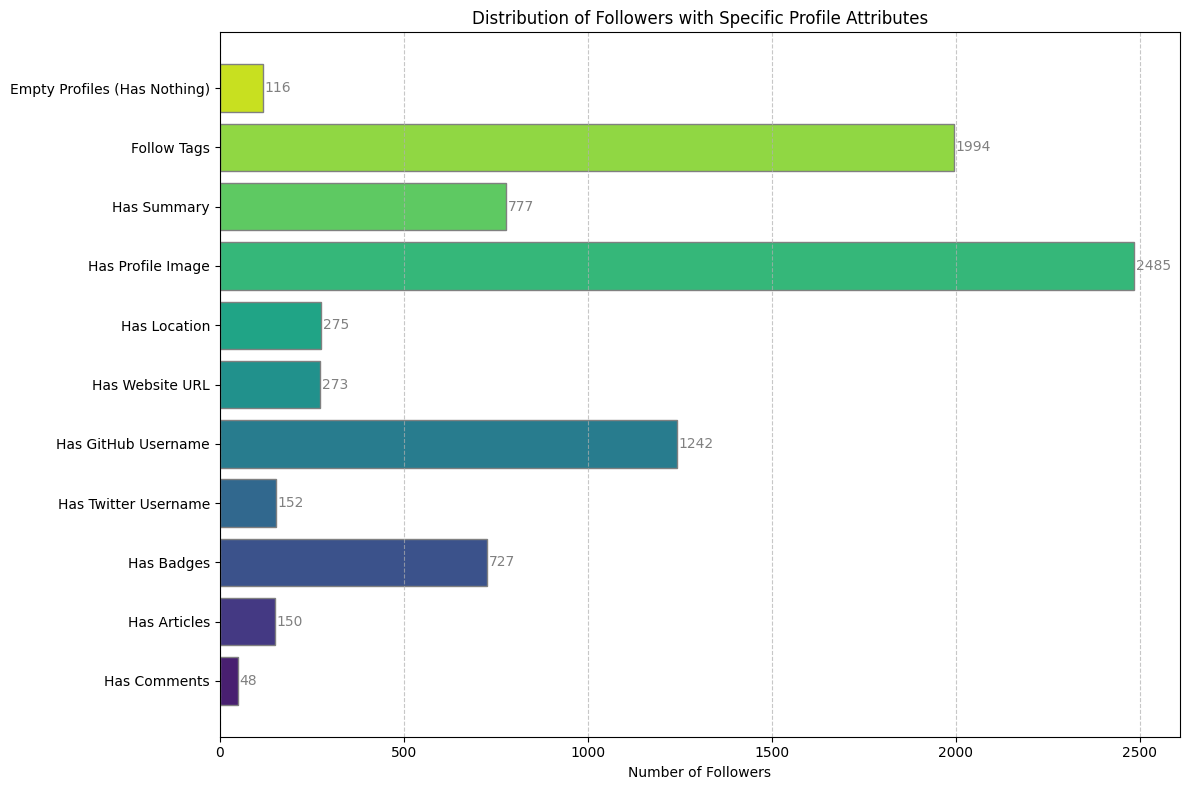

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure 'created_at' and 'joined_at' columns are date-only
articles_df['created_date'] = articles_df['created_at'].dt.date
extended_scrapped_followers_df['joined_date'] = extended_scrapped_followers_df['joined_at'].dt.date

# Get the list of publication dates
article_dates = articles_df['created_date'].unique()

# Calculate counts for each attribute
attribute_counts = {
    "Has Comments": extended_scrapped_followers_df['comments_count'].gt(0).sum(),
    "Has Articles": extended_scrapped_followers_df['article_count'].gt(0).sum(),
    "Has Badges": extended_scrapped_followers_df['badges'].str.len().gt(0).sum(),
    "Has Twitter Username": extended_scrapped_followers_df['twitter_username'].notna().sum(),
    "Has GitHub Username": extended_scrapped_followers_df['github_username'].notna().sum(),
    "Has Website URL": extended_scrapped_followers_df['website_url'].notna().sum(),
    "Has Location": extended_scrapped_followers_df['location'].notna().sum(),
    "Has Profile Image": extended_scrapped_followers_df['profile_image'].notna().sum(),
    "Has Summary": extended_scrapped_followers_df['summary'].notna().sum(),
    "Follow Tags": extended_scrapped_followers_df['tags_count'].gt(0).sum(),
    "Empty Profiles (Has Nothing)": extended_scrapped_followers_df[
        ((extended_scrapped_followers_df['joined_date'].isin(article_dates)) | 
         (~extended_scrapped_followers_df['joined_date'].isin(article_dates))) &
        (extended_scrapped_followers_df['comments_count'] == 0) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['tags_count'] == 0) &
        (extended_scrapped_followers_df['badges'].str.len() == 0) &
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'location', 'website_url', 'summary']]
         .isnull().all(axis=1))
    ].shape[0]
}

# Prepare data for plotting
labels = list(attribute_counts.keys())
values = list(attribute_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with Specific Profile Attributes")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


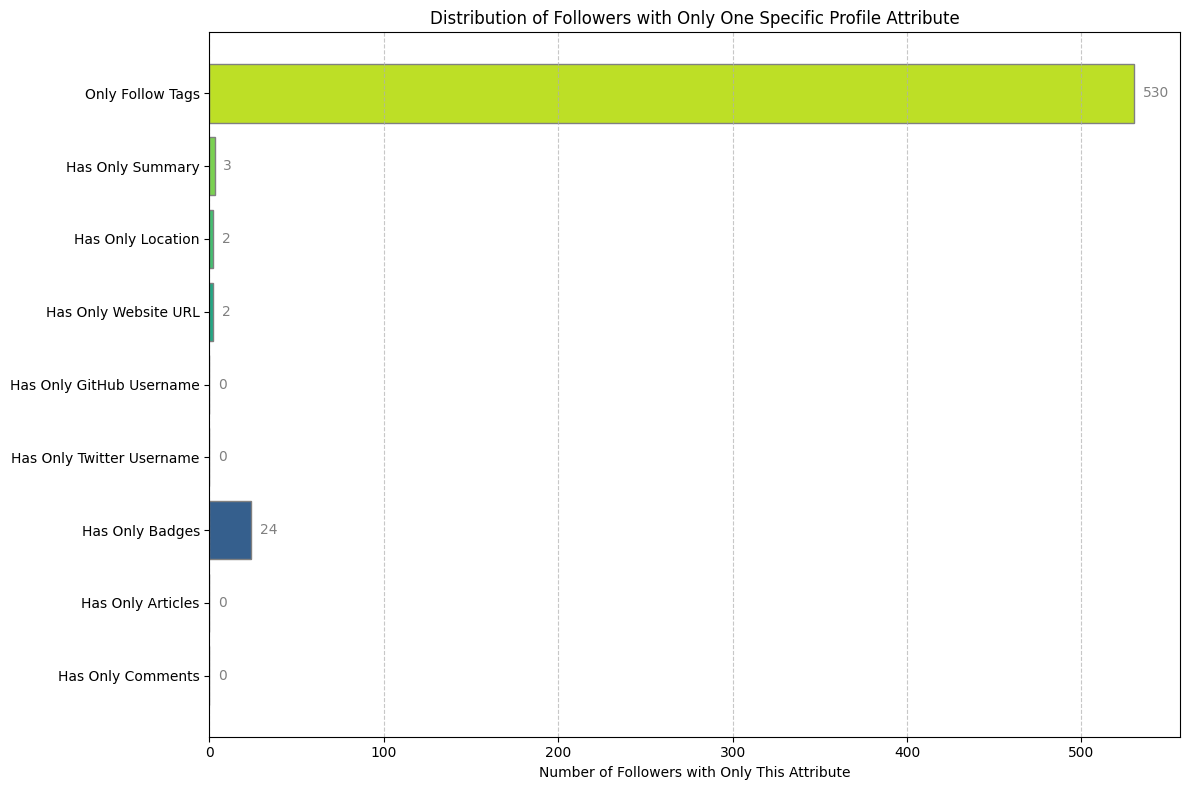

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure 'created_at' and 'joined_at' columns are date-only
articles_df['created_date'] = articles_df['created_at'].dt.date
extended_scrapped_followers_df['joined_date'] = extended_scrapped_followers_df['joined_at'].dt.date

# Define the attributes to analyze
attributes = {
    "Has Only Comments": 'comments_count',
    "Has Only Articles": 'article_count',
    "Has Only Badges": 'badges',
    "Has Only Twitter Username": 'twitter_username',
    "Has Only GitHub Username": 'github_username',
    "Has Only Website URL": 'website_url',
    "Has Only Location": 'location',
    "Has Only Summary": 'summary',
    "Only Follow Tags": 'tags_count'
}

# Calculate counts for followers who have only one attribute and nothing else
only_attribute_counts = {}
for label, column in attributes.items():
    if column == 'badges':
        # For 'badges', check if list length is > 0 and other fields are empty
        only_attribute_counts[label] = extended_scrapped_followers_df[
            (extended_scrapped_followers_df['badges'].str.len() > 0) &
            (extended_scrapped_followers_df['comments_count'] == 0) &
            (extended_scrapped_followers_df['article_count'] == 0) &
            (extended_scrapped_followers_df['tags_count'] == 0) &
            (extended_scrapped_followers_df[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    elif column == 'tags_count':
        # For 'tags_count', check if > 0 and other fields are empty
        only_attribute_counts[label] = extended_scrapped_followers_df[
            (extended_scrapped_followers_df['tags_count'] > 0) &
            (extended_scrapped_followers_df['comments_count'] == 0) &
            (extended_scrapped_followers_df['article_count'] == 0) &
            (extended_scrapped_followers_df['badges'].str.len() == 0) &
            (extended_scrapped_followers_df[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].isnull().all(axis=1))
        ].shape[0]
    else:
        # For other fields, check if the field is not null or > 0 and others are empty
        only_attribute_counts[label] = extended_scrapped_followers_df[
            (extended_scrapped_followers_df[column].notna() if extended_scrapped_followers_df[column].dtype == 'O' 
             else extended_scrapped_followers_df[column] > 0) &
            (extended_scrapped_followers_df['comments_count'] == 0) &
            (extended_scrapped_followers_df['article_count'] == 0) &
            (extended_scrapped_followers_df['tags_count'] == 0) &
            (extended_scrapped_followers_df['badges'].str.len() == 0) &
            (extended_scrapped_followers_df[['twitter_username', 'github_username', 'location', 
                                             'website_url', 'summary']].apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
        ].shape[0]

# Prepare data for plotting
labels = list(only_attribute_counts.keys())
values = list(only_attribute_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers with Only This Attribute")
plt.title("Distribution of Followers with Only One Specific Profile Attribute")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [20]:
# Filter followers who have only badges and no other profile attributes filled
only_badges = extended_scrapped_followers_df[
    (extended_scrapped_followers_df['badges'].str.len() > 0) &  # Has badges
    (extended_scrapped_followers_df['comments_count'] == 0) &  # No comments
    (extended_scrapped_followers_df['article_count'] == 0) &  # No articles
    (extended_scrapped_followers_df['tags_count'] == 0) &  # No tags
    (extended_scrapped_followers_df['twitter_username'].isnull()) &  # No Twitter username
    (extended_scrapped_followers_df['github_username'].isnull()) &  # No GitHub username
    (extended_scrapped_followers_df['location'].isnull()) &  # No location
    (extended_scrapped_followers_df['website_url'].isnull()) &  # No website URL
    (extended_scrapped_followers_df['summary'].isnull())  # No summary
]

# Extract distinct badges from followers who have only badges
distinct_badges = only_badges['badges'].explode().unique()

# Display the distinct badges
distinct_badges


# this is a passive badge

array(['One Year Club'], dtype=object)

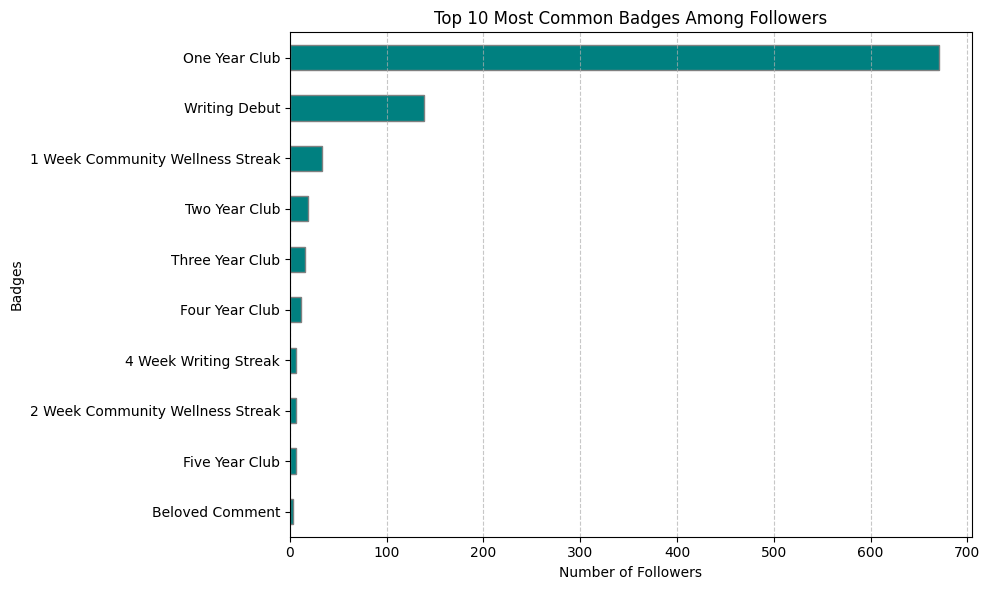

In [21]:
import matplotlib.pyplot as plt

# Explode the badges column in the full followers DataFrame and get the top 10 badges
top_badge_counts = extended_scrapped_followers_df['badges'].explode().value_counts().head(10)

# Plot the distribution of the top 10 badges
plt.figure(figsize=(10, 6))
top_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


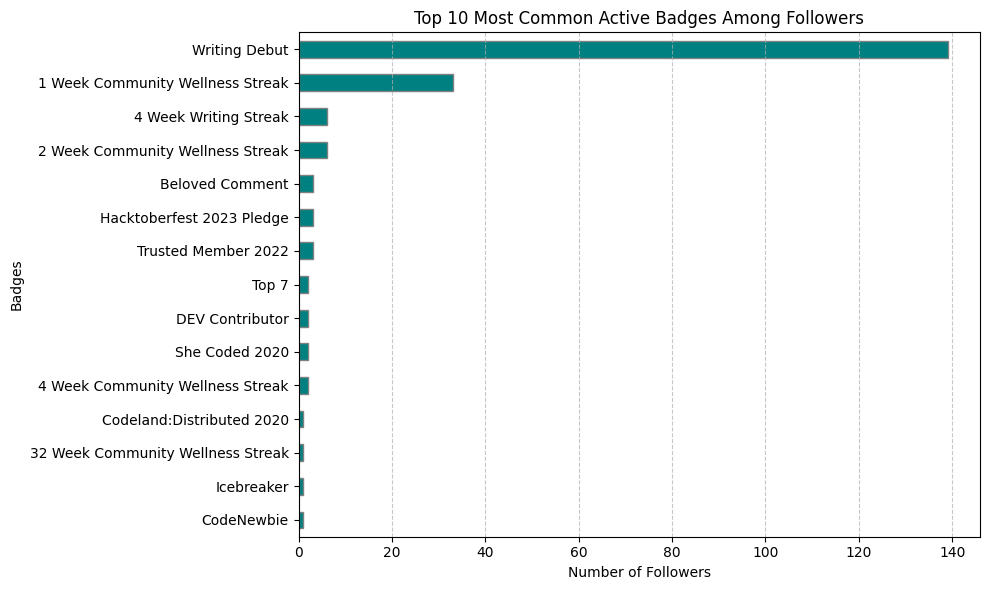

In [22]:
import matplotlib.pyplot as plt

# Explode the badges column in the full followers DataFrame
all_badge_counts = extended_scrapped_followers_df['badges'].explode().value_counts()

# Remove badges that contain "Year Club"
filtered_badge_counts = all_badge_counts[~all_badge_counts.index.str.contains("Year Club")].head(15)

# Plot the distribution of the top 10 active badges after filtering
plt.figure(figsize=(10, 6))
filtered_badge_counts.plot(kind='barh', color='teal', edgecolor='gray')
plt.xlabel("Number of Followers")
plt.ylabel("Badges")
plt.title("Top 10 Most Common Active Badges Among Followers")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()


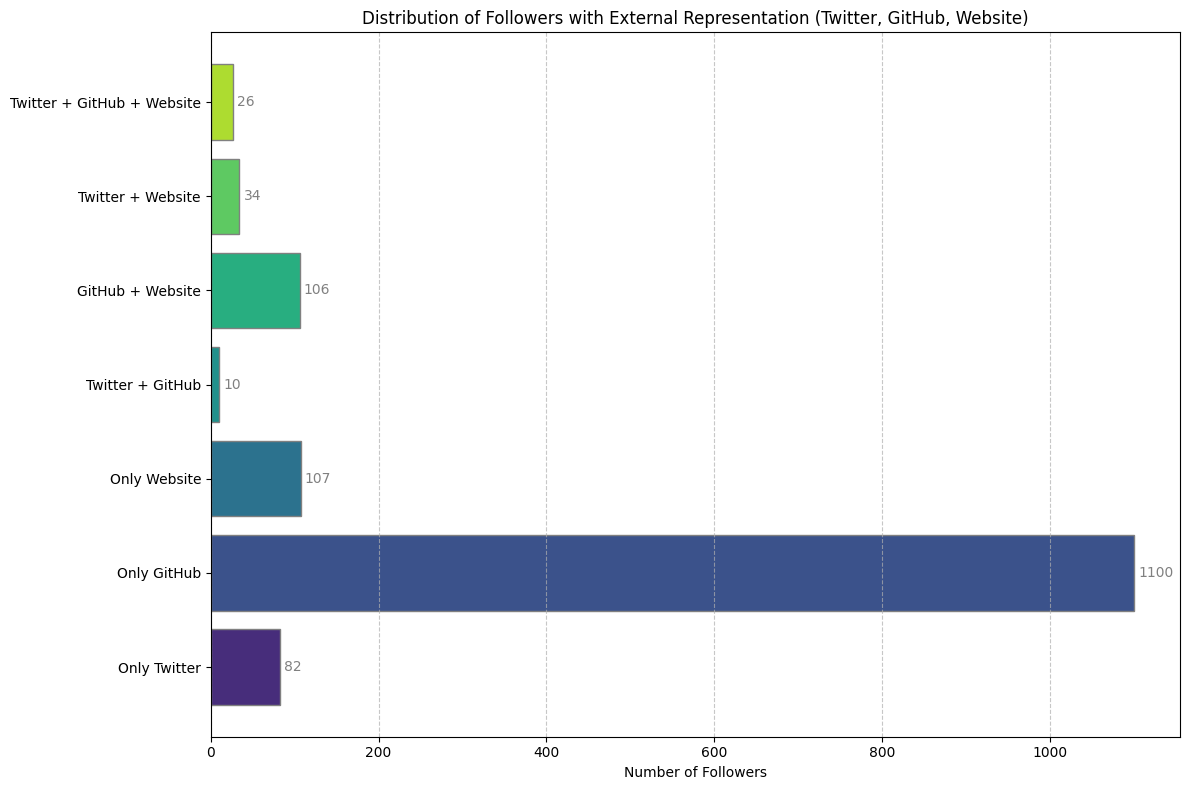

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Define conditions for each group
external_representation_counts = {
    "Only Twitter": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "Only GitHub": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "Only Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].isnull())
    ].shape[0],
    
    "GitHub + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].isnull()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].isnull()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0],
    
    "Twitter + GitHub + Website": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['twitter_username'].notna()) &
        (extended_scrapped_followers_df['github_username'].notna()) &
        (extended_scrapped_followers_df['website_url'].notna())
    ].shape[0]
}

# Prepare data for plotting
labels = list(external_representation_counts.keys())
values = list(external_representation_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers with External Representation (Twitter, GitHub, Website)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [24]:
# Make a copy of the DataFrame to work with
filtered_followers_df = extended_scrapped_followers_df.copy()

# Function to filter out 'Year Club' items
def remove_year_club(budges_list):
    return [badge for badge in budges_list if not badge.endswith("Year Club")]

# Apply the function to the 'budges' column
filtered_followers_df['badges'] = filtered_followers_df['badges'].apply(remove_year_club)
filtered_followers_df['badges']

0                    []
1                    []
2                    []
3                    []
4                    []
             ...       
2480                 []
2481                 []
2482                 []
2483    [Writing Debut]
2484                 []
Name: badges, Length: 2485, dtype: object

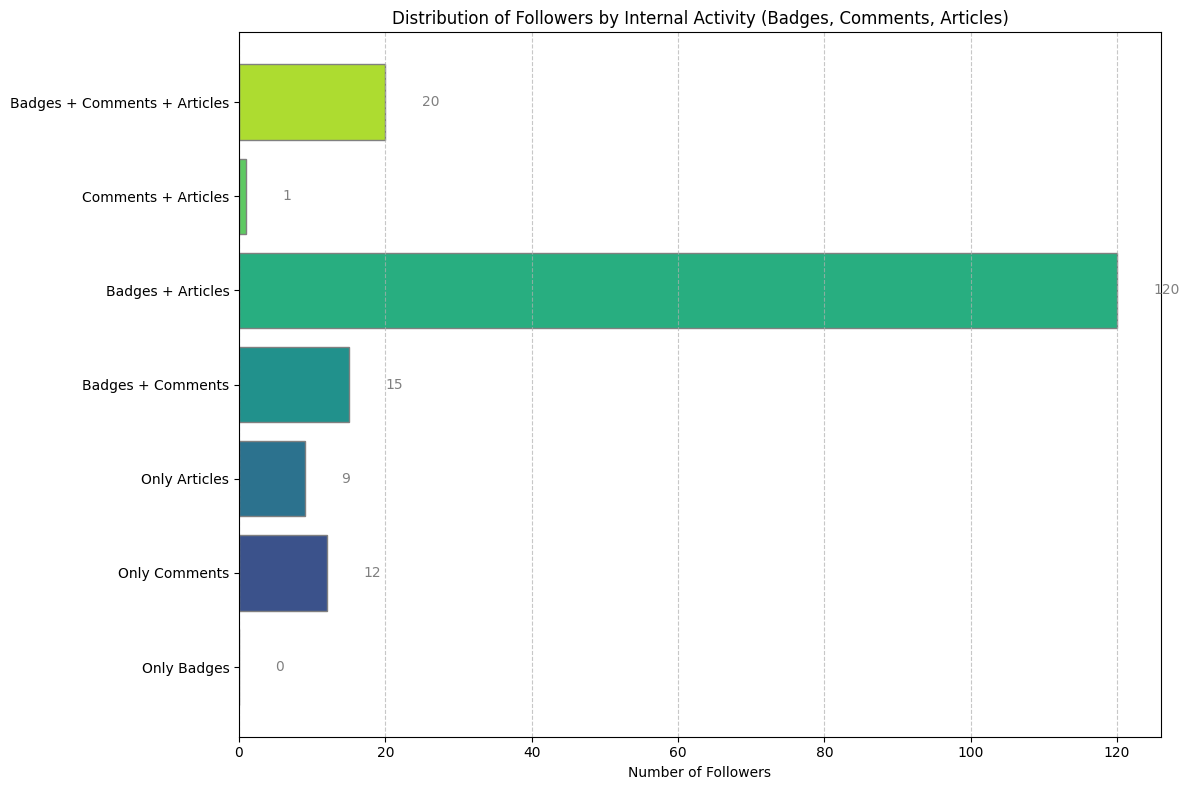

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Make a copy of the DataFrame to work with
filtered_followers_df = extended_scrapped_followers_df.copy()

# Function to filter out 'Year Club' items
def remove_year_club(budges_list):
    return [badge for badge in budges_list if not badge.endswith("Year Club")]

# Apply the function to the 'budges' column
filtered_followers_df['badges'] = filtered_followers_df['badges'].apply(remove_year_club)

# Define conditions for each group with filtered badges
internal_activity_counts = {
    "Only Badges": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] == 0) &
        (filtered_followers_df['tags_count'] == 0) &
        (filtered_followers_df[['twitter_username', 'github_username', 'location', 
                                'website_url', 'summary']].isnull().all(axis=1))
    ].shape[0],
    
    "Only Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Only Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Badges + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0]
}

# Prepare data for plotting
labels = list(internal_activity_counts.keys())
values = list(internal_activity_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers by Internal Activity (Badges, Comments, Articles)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [26]:
filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ]

,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count,joined_date
228,user_follower,58152586,2024-10-30 17:32:42+00:00,2309151,Jessica Robin,/jessica_robin_6897a111009,jessica_robin_6897a111009,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,[Bubble Tea Cafe in Seattle: Flavorful Teas & ...,"[news, data]",[4],[0],[0],[],[],0,3,2024-10-30
663,user_follower,31067175,2024-02-28 12:04:55+00:00,1310778,Adebusayo Adewole,/kezia217,kezia217,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,"[Hello everyone, nice meeting you]",[],[0],[0],[0],[],[],0,19,2024-02-28
701,user_follower,31049979,2024-02-28 09:19:26+00:00,1310236,Manisha Koshti,/manishakoshti,manishakoshti,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,[Troubleshooting Guide: What to Do When Your L...,"[laptop, center, hp, service]",[3],[0],[0],[],[],0,0,2024-02-28
763,user_follower,30946200,2024-02-27 11:52:31+00:00,1306958,nishithadamamkar25,/nishithadamamkar25,nishithadamamkar25,"https://media2.dev.to/dynamic/image/width=320,...",None,nishithadamamkar25,...,[mirrormaker2 using strimzi opertator],[],[1],[0],[0],[],[],0,12,2024-02-27
911,user_follower,30850184,2024-02-26 14:58:26+00:00,1304016,~,/funkegoodvibe,funkegoodvibe,"https://media2.dev.to/dynamic/image/width=320,...",None,FunkeGoodVibe,...,[Test],[test],[1],[0],[0],[],[],0,17,2024-02-26
963,user_follower,30823388,2024-02-26 10:18:00+00:00,1303143,Krypcore,/krypcore,krypcore,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,"[The Many Faces of Blockchain: Types, Totals, ...","[web3, buildweb3apps, krypcore, web3developmen...","[3, 3, 2, 2, 3]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",[],[],0,0,2024-02-26
1424,user_follower,30476519,2024-02-22 09:28:29+00:00,1292539,zzllzzll,/zzllzzll,zzllzzll,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,"[无耻之徒——郭文贵, 郭农场大肆敛财，蚂蚁们血本无归]",[],"[1, 1]","[0, 0]","[0, 0]",[],[],0,0,2024-02-22
1666,user_follower,30289906,2024-02-20 12:03:52+00:00,1286684,LEO Mobile App Builder,/leoapp,leoapp,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,[Create A Mobile App With LEO Mobile App Build...,"[shopifyappbuilder, mobileappbuilder, shopifya...",[3],[0],[2],[],[],0,4,2024-02-20
1883,user_follower,26330306,2023-10-11 02:37:18+00:00,1155107,Seyedjahad ghorabi,/new-light-106,new-light-106,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,[B],[],[0],[0],[0],[],[This badge celebrates the longevity of those ...,0,5,2023-09-06


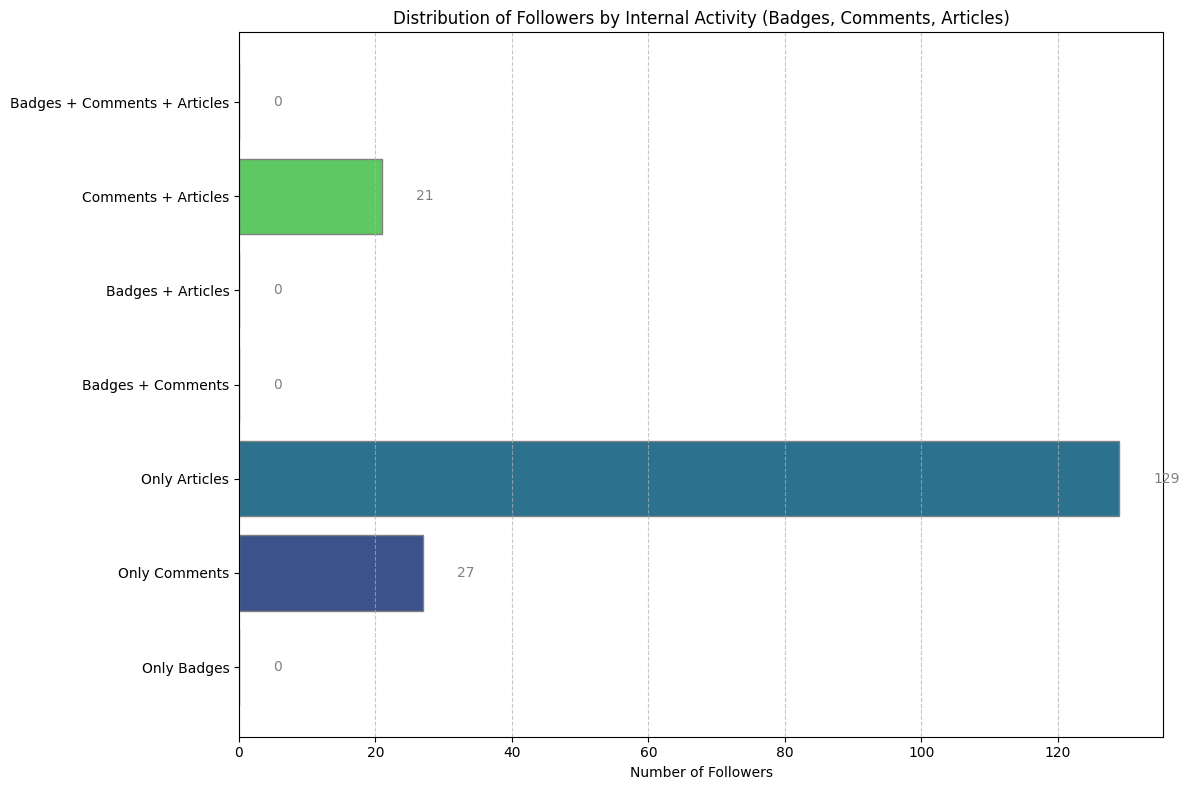

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Make a copy of the DataFrame to work with
filtered_followers_df = extended_scrapped_followers_df.copy()

# Filter out "Year Club" badges completely
filtered_followers_df['badges'] = filtered_followers_df['badges'].apply(
    lambda badges: [badge for badge in badges if "Year Club" not in badge] if isinstance(badges, list) else []
)

# Redefine conditions for each group with accurately filtered badges
internal_activity_counts = {
    "Only Badges": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &  # Has at least one badge (excluding "Year Club")
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] == 0) &
        (filtered_followers_df['tags_count'] == 0) &
        (filtered_followers_df[['twitter_username', 'github_username', 'location', 
                                'website_url', 'summary']].isnull().all(axis=1))
    ].shape[0],
    
    "Only Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Only Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Badges + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] == 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() == 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0],
    
    "Badges + Comments + Articles": filtered_followers_df[
        (filtered_followers_df['badges'].str.len() > 0) &
        (filtered_followers_df['comments_count'] > 0) &
        (filtered_followers_df['article_count'] > 0)
    ].shape[0]
}

# Prepare data for plotting
labels = list(internal_activity_counts.keys())
values = list(internal_activity_counts.values())

# Choose a color palette from Seaborn
palette = sns.color_palette("viridis", len(labels))

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(labels, values, color=palette, edgecolor='gray')

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', 
             va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers by Internal Activity (Badges, Comments, Articles)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


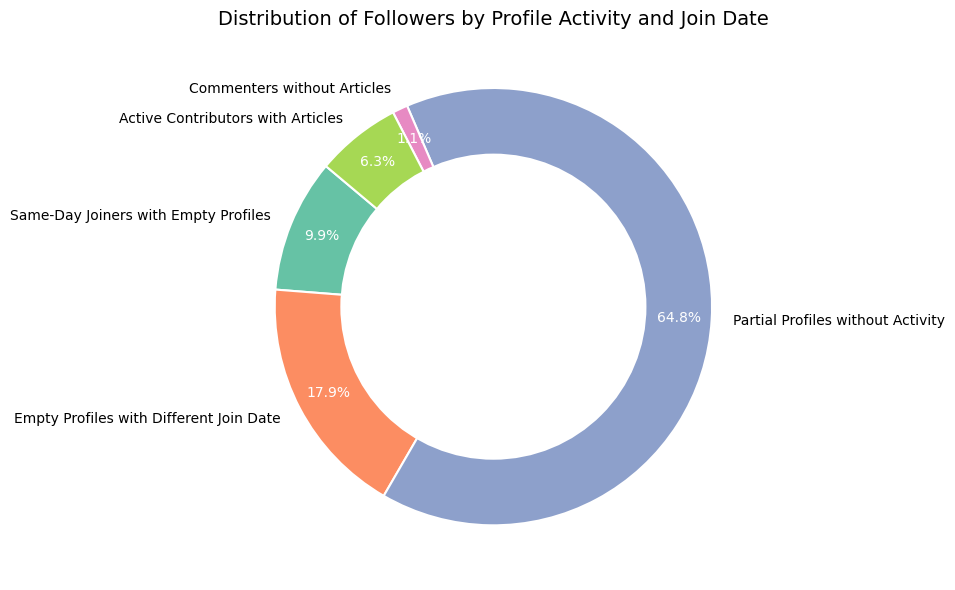

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'created_at' and 'joined_at' columns are date-only
articles_df['created_date'] = articles_df['created_at'].dt.date
extended_scrapped_followers_df['joined_date'] = extended_scrapped_followers_df['joined_at'].dt.date

# Get the list of publication dates
article_dates = articles_df['created_date'].unique()

# Define conditions for each category with proper checks
category_counts = {
    "Same-Day Joiners with Empty Profiles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['joined_date'].isin(article_dates)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0) &
        (extended_scrapped_followers_df['badges'].str.len() == 0) &
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
    ].shape[0],
    
    "Empty Profiles with Different Join Date": extended_scrapped_followers_df[
        (~extended_scrapped_followers_df['joined_date'].isin(article_dates)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0) &
        (extended_scrapped_followers_df['badges'].str.len() == 0) &
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
    ].shape[0],
    
    "Partial Profiles without Activity": extended_scrapped_followers_df[
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.notnull() & (x != ''), axis=1).any(axis=1)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0)
    ].shape[0],
    
    "Commenters without Articles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['comments_count'] > 0) &
        (extended_scrapped_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Active Contributors with Articles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['article_count'] > 0)
    ].shape[0]
}

# Plotting the pie chart
labels = list(category_counts.keys())
sizes = list(category_counts.values())
colors = ['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854']  # Soft, distinct colors

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}, pctdistance=0.85
)

# Beautify text for better readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

# Draw a circle at the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Distribution of Followers by Profile Activity and Join Date", fontsize=14)
plt.tight_layout()
plt.show()


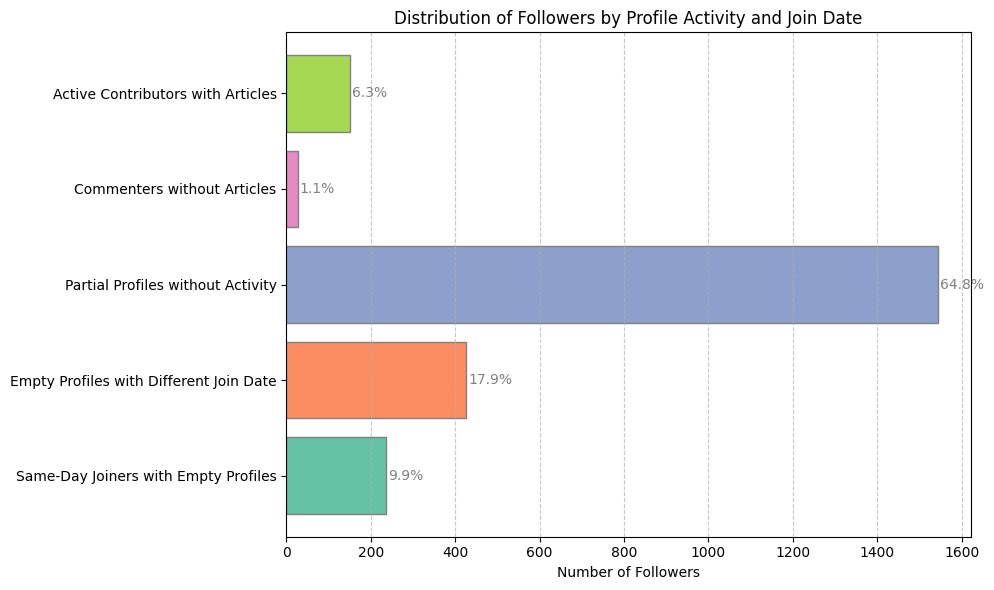

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'created_at' and 'joined_at' columns are date-only
articles_df['created_date'] = articles_df['created_at'].dt.date
extended_scrapped_followers_df['joined_date'] = extended_scrapped_followers_df['joined_at'].dt.date

# Get the list of publication dates
article_dates = articles_df['created_date'].unique()

# Define conditions for each category with proper checks
category_counts = {
    "Same-Day Joiners with Empty Profiles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['joined_date'].isin(article_dates)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0) &
        (extended_scrapped_followers_df['badges'].str.len() == 0) &
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
    ].shape[0],
    
    "Empty Profiles with Different Join Date": extended_scrapped_followers_df[
        (~extended_scrapped_followers_df['joined_date'].isin(article_dates)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0) &
        (extended_scrapped_followers_df['badges'].str.len() == 0) &
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.isnull() | (x == ''), axis=1).all(axis=1))
    ].shape[0],
    
    "Partial Profiles without Activity": extended_scrapped_followers_df[
        (extended_scrapped_followers_df[['twitter_username', 'github_username', 
                                         'summary', 'location', 'website_url']]
         .apply(lambda x: x.notnull() & (x != ''), axis=1).any(axis=1)) &
        (extended_scrapped_followers_df['article_count'] == 0) &
        (extended_scrapped_followers_df['comments_count'] == 0)
    ].shape[0],
    
    "Commenters without Articles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['comments_count'] > 0) &
        (extended_scrapped_followers_df['article_count'] == 0)
    ].shape[0],
    
    "Active Contributors with Articles": extended_scrapped_followers_df[
        (extended_scrapped_followers_df['article_count'] > 0)
    ].shape[0]
}

# Prepare data for plotting
labels = list(category_counts.keys())
values = list(category_counts.values())
colors = ['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3', '#A6D854']  # Soft, distinct colors

# Calculate percentages for each category
total = sum(values)
percentages = [f"{(value / total) * 100:.1f}%" for value in values]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, values, color=colors, edgecolor='gray')

# Add value labels
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, pct, va='center', fontsize=10, color='gray')

# Add titles and labels
plt.xlabel("Number of Followers")
plt.title("Distribution of Followers by Profile Activity and Join Date")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [30]:
extended_scrapped_followers_df[extended_scrapped_followers_df['username'] == "sargonthegreat"]

,type_of,id,created_at,user_id,name,path,username,profile_image,twitter_username,github_username,...,article_titles,unique_tags,article_reading_time_minutes,article_comments_counts,article_positive_reactions_counts,badges,badge_descriptions,comments_count,tags_count,joined_date
204,user_follower,58161484,2024-10-30 19:11:26+00:00,2309628,Sargon The Akkadian,/sargonthegreat,sargonthegreat,"https://media2.dev.to/dynamic/image/width=320,...",None,None,...,[First Post HackingWithSwift],[swift],[1],[0],[0],[Writing Debut],[Awarded for writing and sharing your first DE...,0,11,2024-10-30


In [31]:
import os
import requests
import pandas as pd
import backoff
from time import time
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import re

# Load environment variables from .env file
load_dotenv()
API_KEY = os.getenv("DEV_KEY")
BASE_URL = "https://dev.to/api"

# Headers for authorization
headers = {"api-key": API_KEY, "Accept": "application/vnd.forem.api-v1+json"}


@backoff.on_exception(backoff.expo, requests.exceptions.RequestException, max_tries=5)
def get_user_stats(username):
    """
    Fetches a user's badges, comments count, and tags followed count from DEV.to.

    Args:
        username (str): The DEV.to username.

    Returns:
        tuple: A tuple containing lists of badge titles and descriptions, comment count, and tags count.
    """
    url = f"https://dev.to/{username}/"
    response = requests.get(url, timeout=10)
    response.raise_for_status()  # Raise HTTPError for bad responses

    if response is None:
        return [], [], 0, 0  # Return default empty values if request fails

    soup = BeautifulSoup(response.text, "html.parser")

    # Extract badges and descriptions
    badges = []
    badge_descriptions = []
    badge_elements = soup.find_all("div", class_="badge_text_content")

    for badge in badge_elements:
        badge_title = badge.find("h4", class_="title fw-800 fs-l").text.strip()
        badge_description = badge.find("p", class_="description").text.strip()
        badges.append(badge_title)
        badge_descriptions.append(badge_description)

    # Extract comments written count
    comment_count = 0
    for div in soup.find_all("div", class_="flex items-center mb-4"):
        if "comments written" in div.get_text(strip=True):
            comment_count = int(re.search(r"\d+", div.get_text(strip=True)).group())

    # Extract tags followed count
    tags_count = 0
    for div in soup.find_all("div", class_="flex items-center"):
        text = div.get_text(strip=True)
        if "tags followed" in text:
            tags_count = int(re.search(r"\d+", text).group())

    return badges, badge_descriptions, comment_count, tags_count


get_user_stats("mareyiaz")

(['Writing Debut'],
 ['Awarded for writing and sharing your first DEV post! Continue sharing your work to earn the 4 Week Writing Streak Badge.'],
 0,
 13)